In [1]:
import pandas as pd
import numpy as np

In [2]:
import os 
os.chdir(r'D:\churn prediction')

In [3]:
from src.preprocessing import preprocessing_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import recall_score,precision_score,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

In [4]:
train = pd.read_csv(r'D:\churn prediction\data\train.csv')
test = pd.read_csv(r'D:\churn prediction\data\test.csv')

In [5]:
from src.feature_engineering import drop_state
train = drop_state(train)
test = drop_state(test)

In [6]:
X_train = train.drop(columns='Churn')
y_train = train['Churn']

X_test = test.drop(columns='Churn')
y_test = test['Churn']

In [7]:
#mapping values True :1 , False :0
y_test = y_test.map({True:1,False:0})
y_train =y_train.map({True:1,False:0})

In [8]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier()
model5 = AdaBoostClassifier()
model6 = XGBClassifier()

In [9]:
num_cols = [0,1,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
cat_cols = [2,3]
tnf = preprocessing_pipeline(num_cols,cat_cols)

In [10]:

model_list = [model1,model2,model3,model4,model5,model6]

recall_train_list = []
precision_train_list = []

recall_test_list = []
precision_test_list = []
model_names = []
for model in model_list:
    model_pipe = Pipeline([
        ('tnf',tnf),
        (f'{model.__class__.__name__}',model)
    ])
    
    #train model on data
    model_pipe.fit(X_train,y_train)
    model_names.append(model_pipe[1].__class__.__name__ )
    
    #predictions of model on train and test both
    test_pred = model_pipe.predict(X_test)
    train_pred = model_pipe.predict(X_train)

    #recall score calculation of test and train
    recall_test_list.append(recall_score(y_test,test_pred))
    recall_train_list.append(recall_score(y_train,train_pred))

    #precision score calculation of test and train
    precision_test_list.append(precision_score(y_test,test_pred))

    precision_train_list.append(precision_score(y_train,train_pred)) 

In [11]:
result = pd.DataFrame(
    {
        'models':model_names,
        'recall_test':recall_test_list,
        'recall_train':recall_train_list,
        'precision_test':precision_test_list,
        'precision_train':precision_train_list,
       
    }
)
result.sort_values(by=['recall_test','precision_test'],ascending=False)

,models,recall_test,recall_train,precision_test,precision_train
5,XGBClassifier,0.757895,1.000000,0.923077,1.000000
1,DecisionTreeClassifier,0.747368,1.000000,0.682692,1.000000
2,RandomForestClassifier,0.736842,1.000000,0.972222,1.000000
3,GradientBoostingClassifier,0.705263,0.817010,0.930556,0.981424
4,AdaBoostClassifier,0.484211,0.368557,0.666667,0.687500
0,LogisticRegression,0.178947,0.216495,0.459459,0.579310


In [12]:
num_cols = [0,1,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
cat_cols = [2,3]
tnf = preprocessing_pipeline(num_cols,cat_cols)

In [13]:
model =XGBClassifier(max_depth=3,eta=0.09,scale_pos_weight=5,n_estimators=100,random_state=42)

In [14]:
from src.metrics import metrics_evaluation
from src.training_model import train_model_pipeline

Train metrics
recall: 0.853
precision:0.790
 
Test metrics
recall: 0.832
precision:0.752


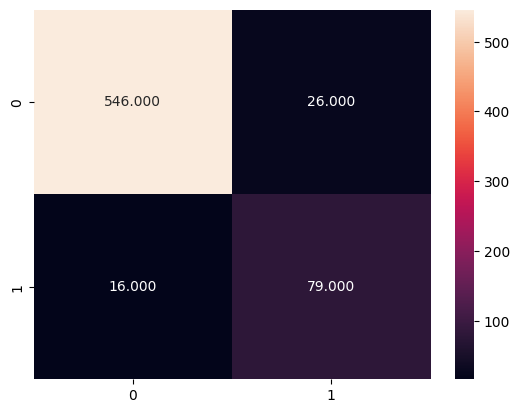

In [15]:
#baseline model

baseline_model = train_model_pipeline(model,tnf,X_train,y_train)
metrics_evaluation(baseline_model,X_train,X_test,y_train,y_test)

In [16]:
from src.metrics import validation_evalution

In [17]:
val_recall = validation_evalution(baseline_model,'recall',X_train,y_train)
print(f'validation recall : {val_recall}')

validation recall : 0.8349983349983351


In [18]:
val_precision = validation_evalution(baseline_model,'precision',X_train,y_train)
print(f'validation precision : {val_precision}')

validation precision : 0.7314402819741892


In [19]:
from output.results_io import load_results,save_results

In [20]:
#rerun will cause the update again in the values!
#save_results(baseline_model,'baseline_xgboost',X_train,X_test,y_train,y_test)

In [21]:
load_results()

,model,recall_test,precision_test,recall_train,precision_train
0,baseline_xgboost,0.831579,0.752381,0.853093,0.789976
1,RandomForestClassifier,0.873684,0.988095,0.863402,0.988201
2,GradientBoostingClassifier,0.873684,0.988095,0.868557,1.000000
3,XGBClassifier,0.873684,0.976471,0.863402,0.991124


In [22]:
import pickle
pickle.dump(baseline_model,open(r'D:\churn prediction\models\baseline_model.pkl','wb'))